In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv("~/tree_stats.csv")
df.head()

,exp,prod,sum,const,nodes,unique_feats,filename,algo
0,0,0,0,8,8,8,COIL20_new/COIL20_run_5/COIL20-0.0912759776250...,NEW
1,6,6,3,32,47,26,COIL20_new/COIL20_run_5/COIL20-0.0284701961770...,NEW
2,6,3,2,28,39,22,COIL20_new/COIL20_run_5/COIL20-0.0314708039906...,NEW
3,1,1,0,17,19,17,COIL20_new/COIL20_run_5/COIL20-0.0552640379312...,NEW
4,1,1,0,16,18,16,COIL20_new/COIL20_run_5/COIL20-0.0568129145241...,NEW


In [8]:
df.tail()

,exp,prod,sum,const,nodes,unique_feats,filename,algo
3057,324,120,169,826,1439,473,COIL20_old/25/COIL20-0.023901697220359175-20.0...,OLD
3058,523,227,204,1206,2160,699,COIL20_old/25/COIL20-0.019369876667411523-55.0...,OLD
3059,839,335,300,1859,3333,820,COIL20_old/25/COIL20-0.010431396247857272-90.0...,OLD
3060,816,333,293,1811,3253,815,COIL20_old/25/COIL20-0.01197370565988548-84.0....,OLD
3061,324,120,151,791,1386,490,COIL20_old/25/COIL20-0.021547095070422406-32.0...,OLD


In [9]:
DS_LIST=['COIL20','dermatology', 'wine', 'isolet', 'image-segmentation']
contains_str=""
for i in DS_LIST:
    contains_str+=f"{i}|"
contains_str = contains_str[:-1]
df = df[df['filename'].str.contains(contains_str)]

In [10]:
df.head()

,exp,prod,sum,const,nodes,unique_feats,filename,algo
0,0,0,0,8,8,8,COIL20_new/COIL20_run_5/COIL20-0.0912759776250...,NEW
1,6,6,3,32,47,26,COIL20_new/COIL20_run_5/COIL20-0.0284701961770...,NEW
2,6,3,2,28,39,22,COIL20_new/COIL20_run_5/COIL20-0.0314708039906...,NEW
3,1,1,0,17,19,17,COIL20_new/COIL20_run_5/COIL20-0.0552640379312...,NEW
4,1,1,0,16,18,16,COIL20_new/COIL20_run_5/COIL20-0.0568129145241...,NEW


In [11]:
df.tail()

,exp,prod,sum,const,nodes,unique_feats,filename,algo
3057,324,120,169,826,1439,473,COIL20_old/25/COIL20-0.023901697220359175-20.0...,OLD
3058,523,227,204,1206,2160,699,COIL20_old/25/COIL20-0.019369876667411523-55.0...,OLD
3059,839,335,300,1859,3333,820,COIL20_old/25/COIL20-0.010431396247857272-90.0...,OLD
3060,816,333,293,1811,3253,815,COIL20_old/25/COIL20-0.01197370565988548-84.0....,OLD
3061,324,120,151,791,1386,490,COIL20_old/25/COIL20-0.021547095070422406-32.0...,OLD


In [12]:
new = df[df["algo"]=="NEW"]
new.tail()

,exp,prod,sum,const,nodes,unique_feats,filename,algo
770,14,7,10,42,73,32,COIL20_new/COIL20_run_30/COIL20-0.026372505868...,NEW
771,6,0,2,23,31,22,COIL20_new/COIL20_run_30/COIL20-0.031829309188...,NEW
772,10,8,7,40,65,32,COIL20_new/COIL20_run_30/COIL20-0.026398832811...,NEW
773,1,0,0,3,4,3,COIL20_new/COIL20_run_30/COIL20-0.160143488244...,NEW
774,10,6,6,36,58,31,COIL20_new/COIL20_run_30/COIL20-0.026610962068...,NEW


In [13]:
old = df[df["algo"]=="OLD"]
old.tail()

,exp,prod,sum,const,nodes,unique_feats,filename,algo
3057,324,120,169,826,1439,473,COIL20_old/25/COIL20-0.023901697220359175-20.0...,OLD
3058,523,227,204,1206,2160,699,COIL20_old/25/COIL20-0.019369876667411523-55.0...,OLD
3059,839,335,300,1859,3333,820,COIL20_old/25/COIL20-0.010431396247857272-90.0...,OLD
3060,816,333,293,1811,3253,815,COIL20_old/25/COIL20-0.01197370565988548-84.0....,OLD
3061,324,120,151,791,1386,490,COIL20_old/25/COIL20-0.021547095070422406-32.0...,OLD


In [14]:
# let's drop bad columns
new = new.drop(['filename','algo'], axis=1)
old = old.drop(['filename','algo'], axis=1)

In [47]:
def summary_plots(df, dfname):
    title_dict={
        'exp': '# $\mathcal{O}(2^{n})$ nodes',
        'prod': '# $\mathcal{O}(n^{2})$ nodes',
        'sum': '# $\mathcal{O}(n)$ nodes',
        'const': '# $\mathcal{O}(1)$ nodes',
        'nodes': '# nodes',
        'unique_feats': '# unique featues'
    }

    fig, axs = plt.subplots(2,3, figsize=(10, 10))  # create a 3x2 subplot
    for i, col in enumerate(new.columns):  # loop over the columns
        ax = axs[0 if (i<3) else 1, i%3]  # get the corresponding axis
        ax.xaxis.set_major_locator(plt.MaxNLocator(3))
        ax.hist(df[col], bins=10)  # create a histogram of the column data
        ax.axvline(np.median(df[col]), color='red', linestyle='dashed', linewidth=2)
        ax.set_title(f"{title_dict[col]}", fontsize=20)  # set the title of the subplot
        ax.tick_params(axis='x', labelsize=20, pad=10)
        ax.tick_params(axis='y', labelsize=20)

    plt.tight_layout()  # adjust the spacing between subplots
    fig.suptitle(f"{dfname} summary statistics", y=1.01, fontsize=20)
    plt.show()  # show the plot

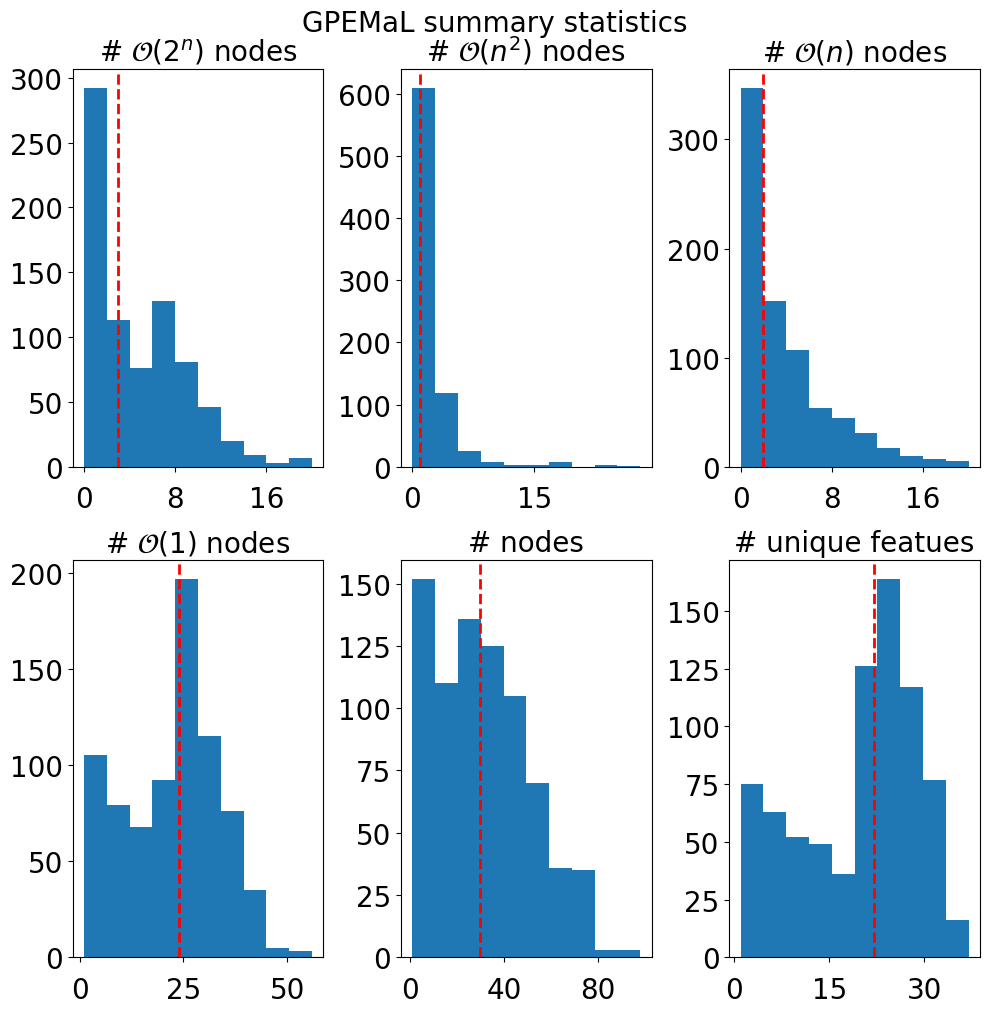

In [48]:
summary_plots(new, "GPEMaL")

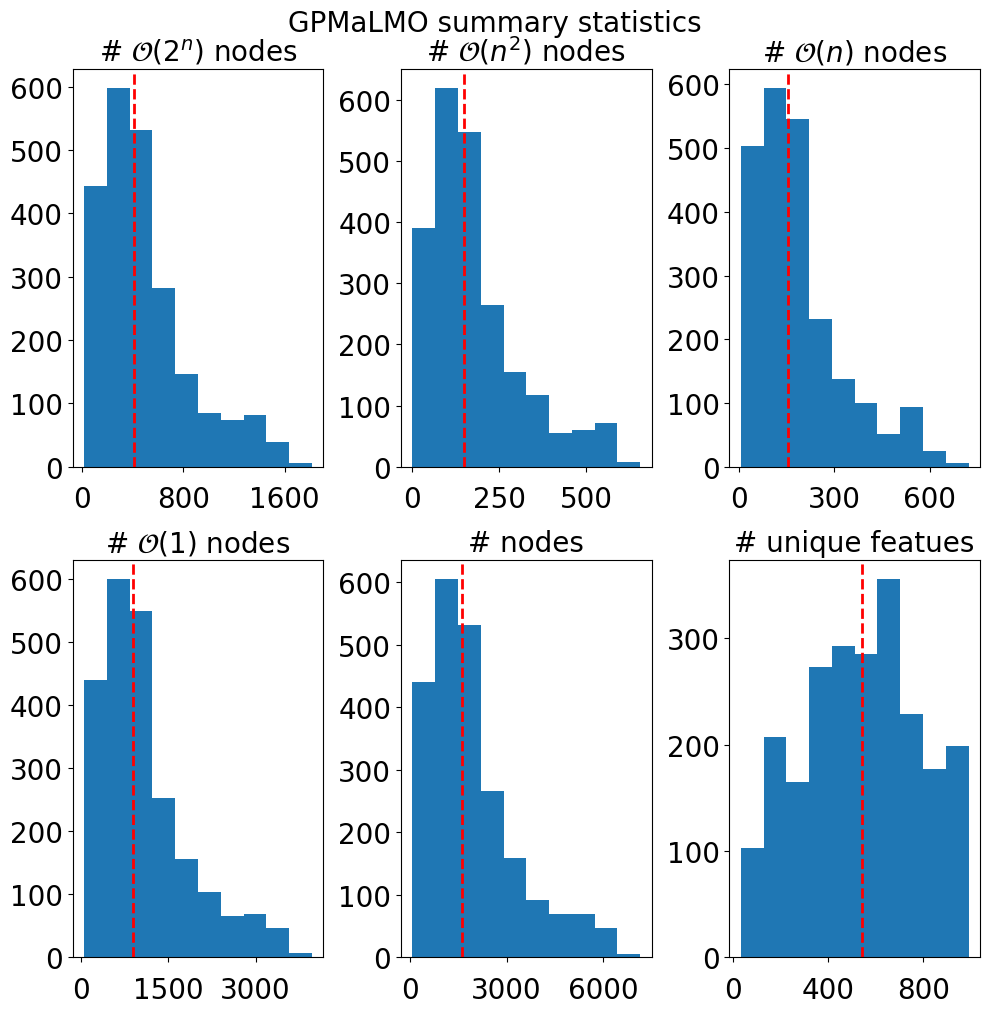

In [49]:
summary_plots(old, "GPMaLMO")